In [104]:
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd
import statsmodels.api as sm

Data Cleansing

In [105]:
df = pd.read_csv('diabetesNINE.csv')
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


Check for missing values

In [106]:
missing_counts = df.isnull().sum()
print(missing_counts)

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


Check for duplicate rows

In [107]:
duplicate_sum = df.duplicated().sum()
print(duplicate_sum)

3854


Drop Duplicates

In [108]:
df_noDupe = df.drop_duplicates()


Check values of 'smoking history' for the ability to convert to a boolean measure

In [109]:
uniquesmokers = df['smoking_history'].unique()
valuecounts = df['smoking_history'].value_counts()
print(valuecounts)

smoking_history
No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: count, dtype: int64


Smoking_history values are inconsistent and incompatible with a boolean conversion.

Check for ages of zero, which would be trigger a drop.

In [110]:
specific_value = [0]
value_counts = df['age'].isin(specific_value).sum()
print(value_counts)

0


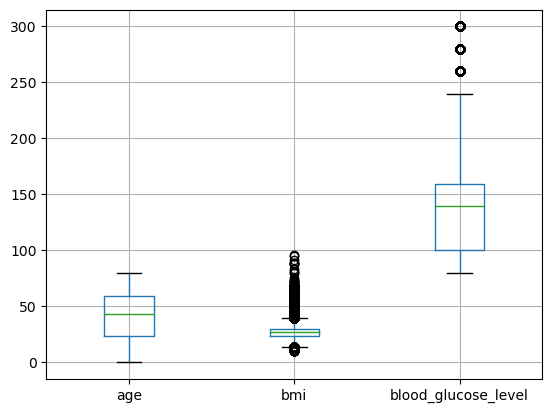

In [149]:
columns_plot = ['age', 'bmi','blood_glucose_level']
df_noDupe[columns_plot].boxplot()
plt.show()

In [112]:
columns_qual = ['hypertension', 'heart_disease', 'diabetes']
df_noDupe[columns_qual].describe()

,hypertension,heart_disease,diabetes
count,96146.000000,96146.000000,96146.000000
mean,0.077601,0.040803,0.088220
std,0.267544,0.197833,0.283616
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000


Check for and count Outliers

In [113]:
column_outliers = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']
Q1 = df_noDupe[column_outliers].quantile(.25)
Q3 = df_noDupe[column_outliers].quantile(.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
outliers = (df_noDupe[column_outliers] < lower_bound) | (df_noDupe[column_outliers] > upper_bound)
num_outliers = outliers.sum()
print(num_outliers)

age                       0
bmi                    5354
HbA1c_level            1312
blood_glucose_level    2031
dtype: int64


In [114]:
print(df_noDupe.dtypes)

gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object


In [115]:
df_noDupe.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [116]:
old_male = 'Male'
new_male = 1
old_fem = 'Female'
new_fem = 0
df_noDupe.loc[:, 'gender'] = df_noDupe['gender'].replace(old_male, new_male)
df_noDupe.loc[:, 'gender'] = df_noDupe['gender'].replace(old_fem, new_fem)
gender_counts = df_noDupe['gender'].value_counts()
print(gender_counts)

gender
0        56161
1        39967
Other       18
Name: count, dtype: int64


In [117]:
gender_drop = 'Other'
column_drop = 'gender'
df_noDupe2 = df_noDupe[df_noDupe['gender'] != gender_drop]
gender_counts2 = df_noDupe2['gender'].value_counts()
print(gender_counts2)

gender
0    56161
1    39967
Name: count, dtype: int64


In [118]:
df_noDupe2.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,96128.000000,96128.000000,96128.000000,96128.000000,96128.000000,96128.000000,96128.000000
mean,41.796617,0.077615,0.040810,27.321450,5.532633,138.218001,0.088237
std,22.463329,0.267567,0.197851,6.767811,1.073225,40.911190,0.283640
min,0.080000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.000000,0.000000,23.400000,4.800000,100.000000,0.000000
50%,43.000000,0.000000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,59.000000,0.000000,0.000000,29.860000,6.200000,159.000000,0.000000
max,80.000000,1.000000,1.000000,95.690000,9.000000,300.000000,1.000000


In [125]:
missing_values2 = df_noDupe2.isnull().sum()
print(missing_values2)
total_values = df_noDupe2.value_counts().sum()
print(total_values)

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64
96128


In [133]:
hypertension_counts = df_noDupe2['hypertension'].value_counts()
diabetes_counts = df_noDupe2['diabetes'].value_counts()
heart_counts = df_noDupe2['heart_disease'].value_counts()
print(hypertension_counts, diabetes_counts, heart_counts)

hypertension
0    88667
1     7461
Name: count, dtype: int64 diabetes
0    87646
1     8482
Name: count, dtype: int64 heart_disease
0    92205
1     3923
Name: count, dtype: int64


<Axes: xlabel='heart_disease', ylabel='count'>

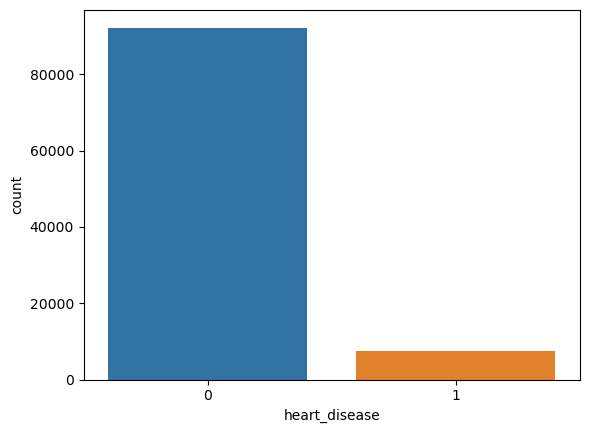

In [152]:
sns.countplot(x='heart_disease', data=df_noDupe2)


<Axes: xlabel='hypertension', ylabel='count'>

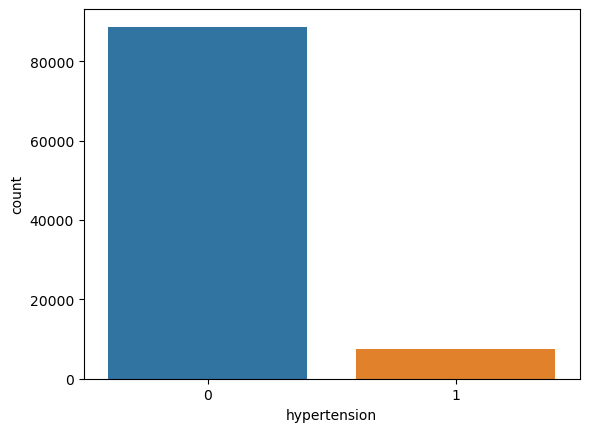

In [153]:
sns.countplot(x='hypertension', data=df_noDupe2)


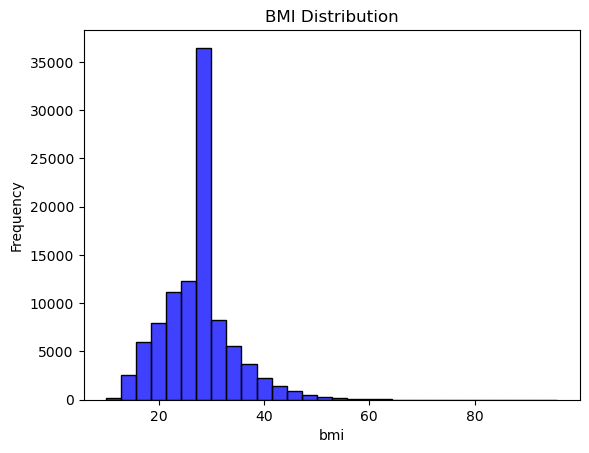

In [160]:
sns.histplot(df['bmi'], bins=30, kde=False, color='blue', edgecolor='black')
plt.title('BMI Distribution')
plt.ylabel('Frequency')
plt.show()

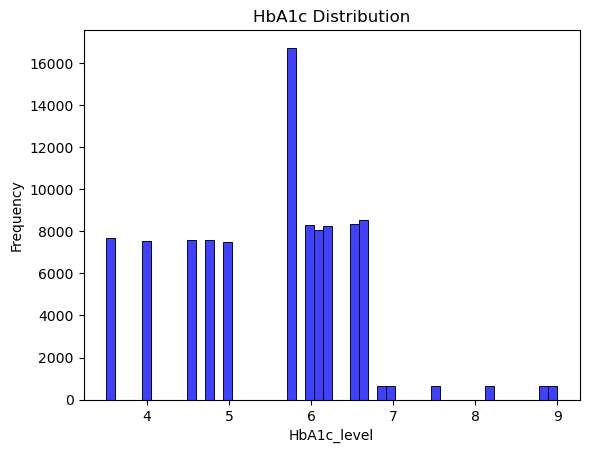

In [162]:
sns.histplot(df['HbA1c_level'], bins=50, kde=False, color='green', edgecolor='black')
plt.title('HbA1c Distribution')
plt.ylabel('Frequency')
plt.show()

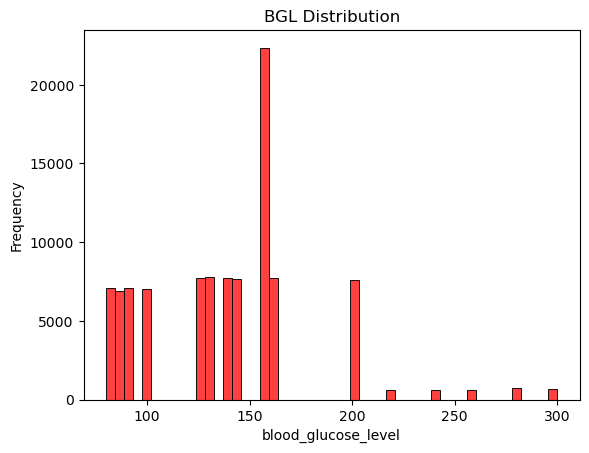

In [171]:
sns.histplot(df['blood_glucose_level'], bins=50, kde=False, color='red', edgecolor='black')
plt.title('BGL Distribution')
plt.ylabel('Frequency')
plt.show()

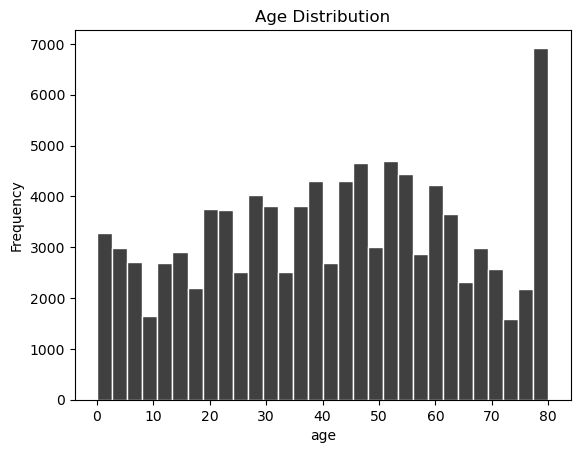

In [169]:
sns.histplot(df['age'], bins=30, kde=False, color='black', edgecolor='white')
plt.title('Age Distribution')
plt.ylabel('Frequency')
plt.show()

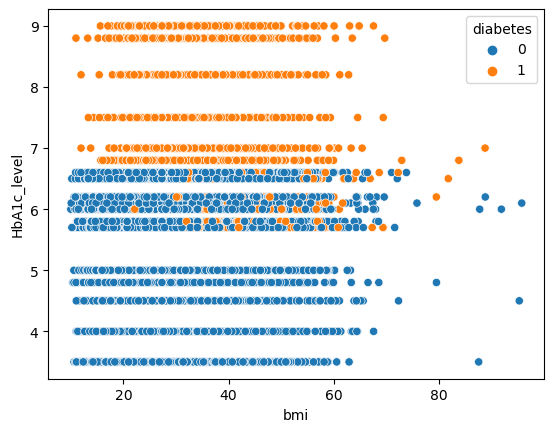

In [172]:
g = sns.scatterplot(x= "bmi" ,y= "HbA1c_level",
              hue="diabetes",
              data=df_noDupe2);

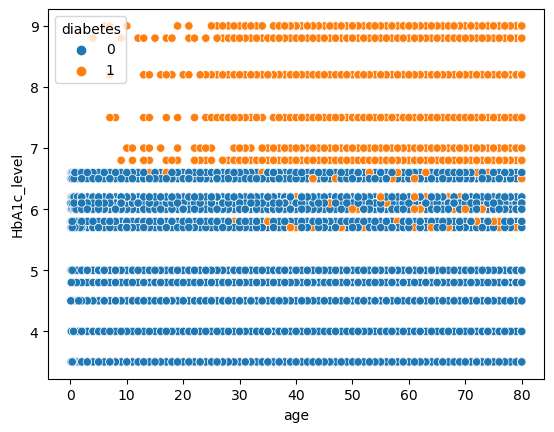

In [173]:
g = sns.scatterplot(x= "age" ,y= "HbA1c_level",
              hue="diabetes",
              data=df_noDupe2);

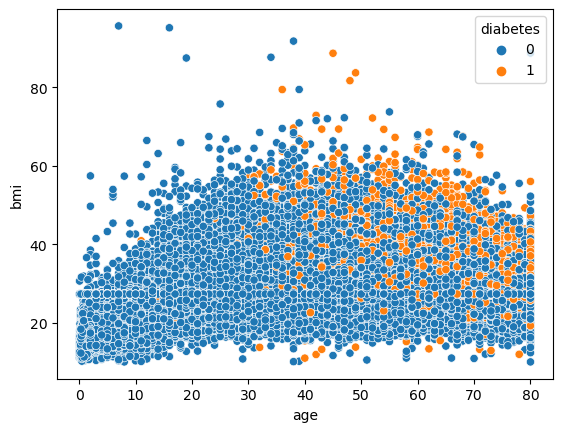

In [174]:
g = sns.scatterplot(x= "age" ,y= "bmi",
              hue="diabetes",
              data=df_noDupe2);

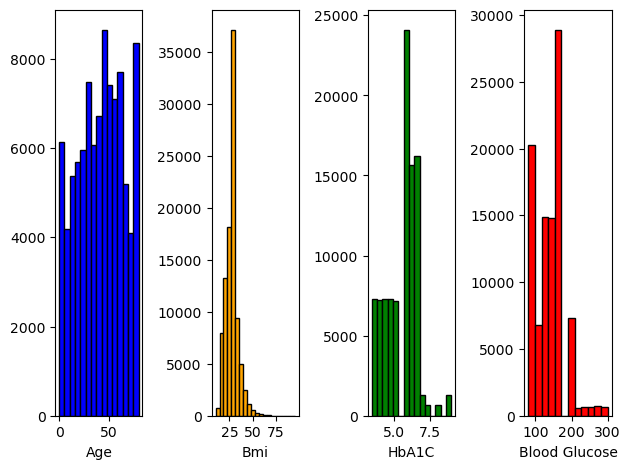

In [170]:
fig, axes = plt.subplots(nrows=1, ncols=4,)
axes[0].hist(df_noDupe2['age'], bins=15, color='blue', edgecolor='black')
axes[0].set_xlabel('Age')
axes[1].hist(df_noDupe2['bmi'], bins=20, color='orange', edgecolor='black')
axes[1].set_xlabel('Bmi')
axes[2].hist(df_noDupe2['HbA1c_level'], bins=15, color='green', edgecolor='black')
axes[2].set_xlabel('HbA1C')
axes[3].hist(df_noDupe2['blood_glucose_level'], bins=12, color='red', edgecolor='black')
axes[3].set_xlabel('Blood Glucose')
plt.tight_layout()



<Axes: >

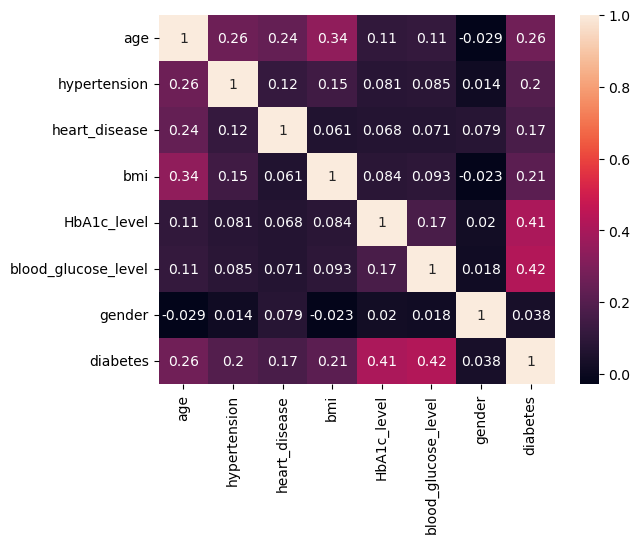

In [155]:
selected_columns = ['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'gender', 'diabetes']
corr_data_selected = df_noDupe2[selected_columns].corr()
sns.heatmap(corr_data_selected, annot=True)

<Axes: >

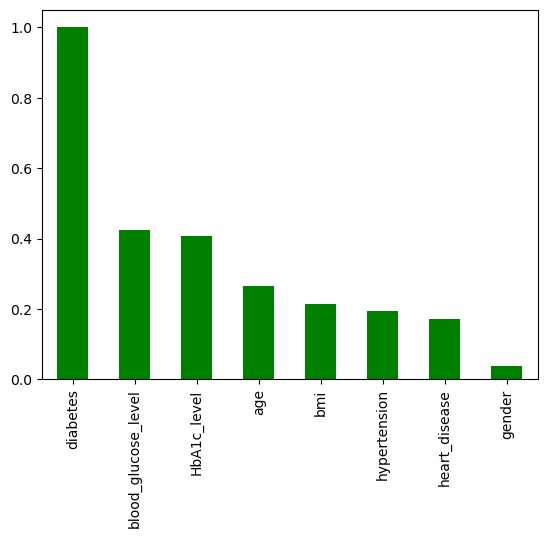

In [128]:
corr_sorted = corr_data_selected['diabetes'].sort_values(ascending=False)
corr_sorted.plot(kind='bar', color='green')

In [140]:
print(df_noDupe2.dtypes)
df_noDupe2.loc[:, 'gender'] = df_noDupe2['gender'].astype('int64')

gender                   int64
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object


In [143]:
indep_var = df_noDupe2[['blood_glucose_level', 'HbA1c_level', 'age', 'bmi', 'hypertension', 'heart_disease', 'gender']]
indep_var = sm.add_constant(indep_var)
dep_var = df_noDupe2['diabetes']
regression_model = sm.OLS(dep_var, indep_var).fit()
print(regression_model.summary())

                            OLS Regression Results                            
Dep. Variable:               diabetes   R-squared:                       0.354
Model:                            OLS   Adj. R-squared:                  0.354
Method:                 Least Squares   F-statistic:                     7523.
Date:                Tue, 30 Jan 2024   Prob (F-statistic):               0.00
Time:                        17:24:13   Log-Likelihood:                 5725.6
No. Observations:               96128   AIC:                        -1.144e+04
Df Residuals:                   96120   BIC:                        -1.136e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.8866    

<Axes: >

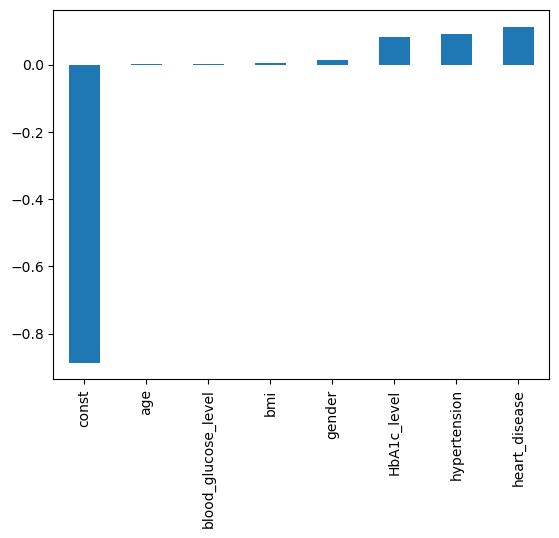

In [144]:
regression_model.params.sort_values(ascending=True).plot(kind='bar')


In [175]:
df_encoded = pd.get_dummies(df_noDupe2, columns=['smoking_history'], prefix='smoke')


In [178]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X = df_encoded[['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level']]
y = df_encoded['diabetes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)

Accuracy: 0.96

Confusion Matrix:
[[17354   171]
 [  656  1045]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     17525
           1       0.86      0.61      0.72      1701

    accuracy                           0.96     19226
   macro avg       0.91      0.80      0.85     19226
weighted avg       0.95      0.96      0.95     19226

